In [1]:
# full import

# system
import os

# data loading/handling
import numpy as np
import pandas as pd
from sklearn import datasets

# data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from graphviz import Source
from sklearn.tree import export_graphviz
%matplotlib inline

# model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# constants
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [2]:
# like SVMs, Decison Trees are versatile Machine Learning algorithms 
# that can perform both classification and regression tasks, and even multioutput tasks.
# they are very powerful algorithms, capable of fitting complex datasets

# Decision Trees are the fundamental components of Random Forest
# which are among the most powerful Machine Learning algorithms available today

# in this chapter, we will start by discussing how to train, visualize, and make predictions with Decision Trees
# then, we will go through the CART training algorithm used by scikit-learn
# and we will discuss how to regularize trees and use them for regression tasks
# finally, we will discuss some of the limitations of Decision Trees

# Training and Visualizing a Decision Tree


To understand Decision Trees, let's just build one and take a look at how it makes predictions

In [3]:
# the following code trains a DecisionTreeClassifier on the iris dataset

iris = datasets.load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

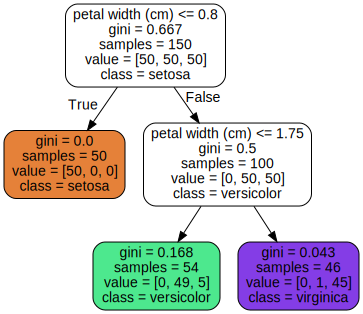

In [4]:
# you can visualize the trained Decision Tree 
# by first using the export_graphviz() method to output a graph definition file called "iris_tree.dot"

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# then you can convert this .dot file to a variety of formats such as .pdf or .png
# using the dot command-line tool from the 'graphviz' package
# or you can open it in the notebook using the graphviz.Source module
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

# Making Predictions


Let's see how the tree above make predictions.
- Suppose you find an iris flower and you want to classify it:
- You start at the **root node** (depth 0, at the top):
    - This node asks whether the flower's petal length is smaller than $2.45 cm$?
    - If it is, then you move down to the root's left child node (depth 1, left).
    - In this case, it is a **leaf node** (i.e. it does not have any children nodes), so it does not ask any questions.
    - The class predicts that your flower is an Iris-Setosa (`class=setosa`).
- Now suppose you find another flower:
- But this time the petal length is greater than $2.45 cm$:
    - You must move down to the root's right child node (depth 1, right).
    - Which is not a leaf node, so it asks the question: Is the petal width is smaller than $1.75 cm$?
    - If it is, then the class predicts that your flower is an Iris-Versicolor (depth 2, left).
    - If not, then the class predicts that your flower is an Iris-Virginica (depth 2, right).


A node's `sample` attribute counts how many training instances it applies to:
- For example, 100 instances have a petal length greater than $2.45 cm$ (depth 1, right).
- Among which 54 have a petal width smaller than $1.75 cm$ (depth 2, left).


A node's `value` attribute tells you how many training instances of each class this node applies to:
- For example, the bottom-right node applies to 0 Iris-Setora, 1 Iris-Versicolor, and 45 Iris-Virginica.


A node's `gini` attribute measures its **impurity**:
- A node is pure (gini = 0) if all training instances it applies to belong to the same class.
- For example, since the depth 1, left node applies only to Iris-Setosa training instances, it is pure and its gini = 0.


Gini impurity:
> $G_i=1-\displaystyle\sum_{k=1}^n{p_{i,k}}^2$


**Notations**:
- $p_{i, k}$: is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

---

**Note**:
- One of the many qualities of Decision Trees is they require very little data preparation. In particular, they don't require feature scaling or centering at all.

Text(4.05, 0.5, '(Depth=2)')

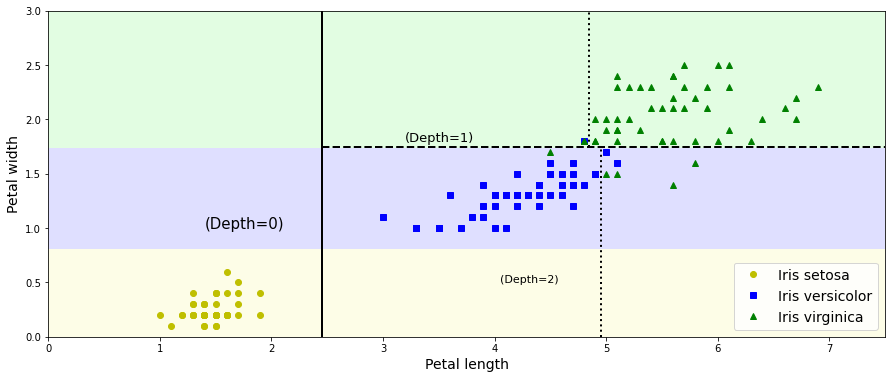

In [5]:
# this figure shows the above Decision Trees's decision boundaries

from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1],
                 "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2],
                 "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


plt.figure(figsize=(15, 6))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "(Depth=0)", fontsize=15)
plt.text(3.2, 1.80, "(Depth=1)", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)


# the thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm
# since the left area is pure (only Iris-Setosa), it cannot be split any further
# however, the right are is impure, so the depth 1 right node splits it at petal width = 1.75 cm (represented by the dashed line)
# since "max_depth" was set to 2, the Decision Tree stops right there
# however, if you set "max_depth" to 3, then the two depth-2 nodes would each add another decision boundary (represented by the dotted lines)

## Model Interpretation: White Box Versus Black Box


As you can see, Decision Trees are fairly intuitive and their decisions are easy to interpret:
- Such models are often called **White Box models**. 
- They make great predictions, and you can easily check the calculations that they performed to make these predictions.


Nevertheless, it is usually hard to explain in simple terms why the predictions are made:
- For example, if a neural network says that a particular person appears on a picture, it is hard to know what actually contributed to this prediction: 
    - Did the model regconize that person's eyes? 
    - Her mouth? 
    - Her nose? 
    - Her shoes? 
    - Or even the couch that she was sitting on? 


Conversely, Decision Trees provide nice and simple classification rules that can even be applied manually if need be.

---

# Estimating Class Probabilities


A Decision Tree can also estimate the probability that an instance belongs to a particular class $k$:
- First, it travels the tree to find the leaf node for this instance.
- Then, it returns the ratio of training instances of class $k$ in this node.

In [6]:
# for example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide
# the corresponding leaf node is depth-2 left node
# so the decision tree should output:
#   # 0% for Iris-Setosa (0/54)
#   # 90.7% for Iris-Versicolor (49/54)
#   # 9.3% for Iris-Virginia (5/54)

print(np.round(tree_clf.predict_proba([[5, 1.5]]), 3))

# and of course, if you ask it to predict the class
# it should output Iris-Versicolor (class 1) since it has the highes probability

print(tree_clf.predict([[5, 1.5]]))

[[0.    0.907 0.093]]
[1]


# The CART Training Algorithm


Scikit-Learn uses the **Classification And Regression Tree** (**CART**) algorithm to train Decision Trees (also called "growing" trees). The idea is really quite simple:
1. The algorithm first splits the training set in two subsets using a single feature $k$ and a threshold $t_k$.
    - How does it choose $k$ and $t_k$?
    - It searches for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size).
    - And trying to minimize the following cost function.


CART cost function for classification:
> $J\left(k, t_k\right) = \dfrac{m_{\text{left}}}{m}G_{\text{left}}+\dfrac{m_{\text{right}}}{m}G_{\text{right}}$


**Notations**:
- $G_{\text{left/right}}$: measures the impurity of the left/right subset.
- $m_{\text{left/right}}$: is the number of instances in the left/right subset.


2. Once it has successfully split the training set in two, it splits the subsets using the same logic, the the sub-subsets and so on, recursively.
3. It stops recursing once it reaches the maximum depth (defined by the `max_depth` hyperparameter), or it cannot find a split that will reduce impurity.
4. A few other hyperparameters control additional stopping conditions:
    - `min_samples_split`
    - `min_samples_leaf`
    - `min_weight_fraction_leaf`
    - `max_leaf_nodes`


**Note**:
- As you can see, the CART algorithm is a **greedy algorithm**: 
    - It greedily searches for an optimum split at the top level, then repeats the process at each level. 
    - It does not check whether or not the split will lead to the lowest possible impurity several levels down.
- A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.
- Unfortunately, finding the optimal tree is known to be an **NP-Complete** problem:
    - It requires $O(\exp(m))$ time, making the problem intractable even for fairly small training sets.
    - This is why we must settle for a "reasonably good" solution.

---

# Computational Complexity


Making predictions requires traversing the Decision Tree from the root to a leaf:
- Decision Trees are generally approximately balanced :
    - So traversing the Decision Tree requires going through roughly $O(\log(m))$ nodes.
- Since each node only requires checking the value of one feature:
    - The overall prediction complexity is just $O(\log(m))$.
    - Independent of the number of features.
- So predictions are very fast, even when dealing with large training sets.


However, the training algorithm compares all features (or less if `max_features` is set) on all samples at each node.
- This results in a training complexity of: $O(n \times m\log(m))$.
- For small training sets (less than a few thousand instances)
    - Scikit-learn can speed up training by presorting the data (set `presort=True`)
    - But this slows down training considerably for large training sets.

---

# Gini Impurity or Entropy?


By default, the Gini impurity measure is used, but you can select the **entropy** impurity measure instead (by setting the `criterion="entropy"`). 


The concept of entropy originated in thermodynamics as a measure of molecular disorder:
- Entropy approaches zero when molecules are still and well ordered.
- It later spread to a wide variety of domains, including Shannon's **information theory**, where it measures the average information content of a message:
    - Entropy is zero when all messages are identical.
    - In Machine Learning, it is frequently used as an impurity measure: a set's entropy is zero when it contains instances of only one class. 
- This equation shows the definition of the entropy of the $i^{th}$ node.


Entropy:
$%\usepackage{asmath}$
> $\large H_i = - \underset{p_{i,k} \neq 0}{\displaystyle\sum_{i=1}^{n}}\hspace{5px}p_{i,k}\times\log_2\left(p_{i,k}\right)\normalsize$


So should you use Gini impurity or Entropy?
- The truth is, most of the time it does not make a big difference: they lead to similar trees.
    - Gini impurity is slightly faster to compute, so it is a good default.
- Howvever, when they differ:
    - Gini impurity tends to isolate the most frequent class in its own branch of the tree.
    - While entropy tends to produce slightly more balanced trees.

---

# Regularization Hyperparameters


Decision Trees make very few assumption about the training data (as oppose to linear models, which obviously assume that the data is linear, for example).
- If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and mostly overfitting it.
- Such a model is often called a **nonparametric model**:
    - Not because it does not have any parameters (it often has a lot)
    - But because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data.
- In constrast, a **parametric model**, such as a linear model:
    - Has a predetermined number of parameters, so its degree of freedom is limited.
    - Therefore reducing the risk of overfitting (but increasing the risk of underfitting).


To avoid over fitting the data, you need to restrict the Decision Tree's freedom during training:
- As you know by now, this is called **regularization**.
- The regularization hyperparameters depend on the algorithm used.
- But generally you can at least restrict the maximum depth of the Decision Tree:
    - In scikit-learn, this is controlled by the `max_depth` hyperparameter (default is `None`, which means unlimited).
    - Reducing `max_depth` will regularize the model and thus reduce the risk of overfitting.


The `DecisionTreeClassifier` class has a few other parameters that similarly restrict the shape of the Decision Tree:
- `min_samples_split`: the minimum number of samples a node must have before it can be split.
- `min_samples_leaf`: the minimum number of samples a leaf node must have.
- `min_weight_fraction_leaf`: same as `min_samples_leaf` but expressed as a fraction of the total number of weighted instances.
- `max_leaf_nodes`: maximum number of leaf nodes.
- `max_features`: maximum number of features that are evaluated for splitting at each node.
+ Increasing `min_*` hyperparameters or reducing `max_*` hyperparameters will regularize the model.


**Note**:
- Other algorithms work by first training the Decision Tree without restrictions, then **pruning** (deleting) unnecessary nodes.
- A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not **statistically significant**:
    - Standard statistical test, such as the $\chi^2$ test, are used to estimate the probability that the improvement is purely the result of chance (which is call **null hypothesis**).
    - If this probability, called **p-value**, is higher than a given threshold (typically $5%$, controlled by a hyperparameter), then the node is considered  unnecessary and its children are deleted.
- The pruning continues until all unnecessary nodes have been pruned.

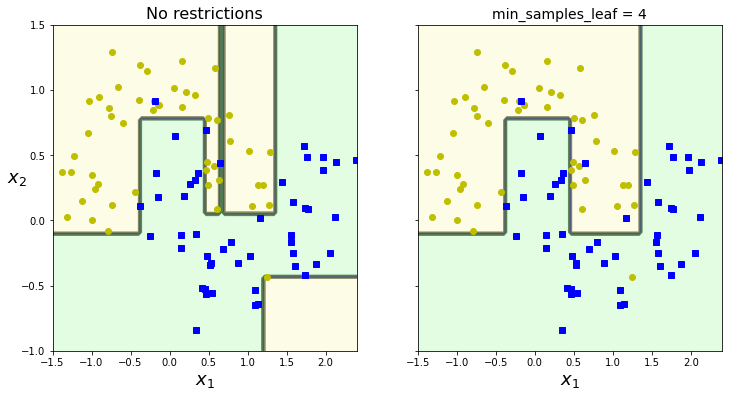

In [7]:
# this figure shows Decision Tree trained on the moons dataset
# on the left:
#   # the Decision Tree is trained without any regularization
# on the right:
#   # the Decision Tree is trained with 'min_samples_leaf=4'
# it is quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better

Xm, ym = datasets.make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
_ = plt.ylabel("")

# Regression 


Decision Tree can also capable of performing regression tasks. 


The CART algorithm works mostly the same way as earlier, except that: 
- Instead of trying to split the training set in a way that minimizes impurity,
- It now tries to split the training set in a way that minimizes the MSE.


CART cost function for regression:
> $J\left(k, t_k\right)=\dfrac{m_\text{left}}{m}\text{MSE}_\text{left} + \dfrac{m_\text{right}}{m}\text{MSE}_\text{right}$


**Notations**:
- $\text{MSE}_\text{node} = \displaystyle\sum_{i \in \text{node}}\left(\hat{y}_\text{node} - y^{(i)} \right)^2$
+ $\hat{y}_\text{node} = \dfrac{1}{m_\text{node}}\displaystyle\sum_{i \in \text{node}}y^{(i)}$


**Note**:
- Just like for classification tasks, Decision Trees are prone to over overfitting when dealing with regression tasks. 

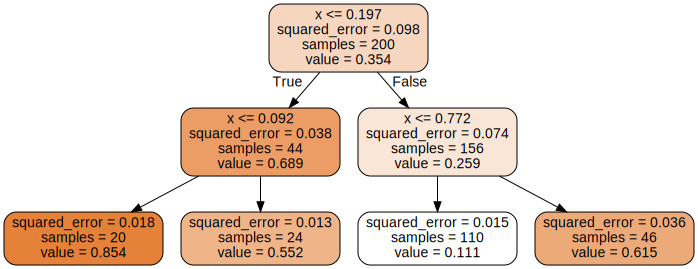

In [8]:
# Let's build a regression tree using Scikit-learn's DecisionTreeRegressor class
# training it on a noisy quadratic dataset with 'max_depth = 2'

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# create and train model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

export_graphviz(
    tree_reg,
    out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
    feature_names=["x"],
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

# this tree looks very similar to the classification tree you built earlier
# the main difference is that instead of predicting a class in each node, it predicts a value
# for example: suppose you want to make a prediction with x = 0.6
#   # you traverse the tree starting at the root
#   # and you eventually reach the leaf node that predicts value = 0.1106
# this prediction is simply the average target value of the 110 training instances associated to this leaf node
# this prediction results in a Mean Squared Error (MSE) equal to 0.0151 over these 110 instances

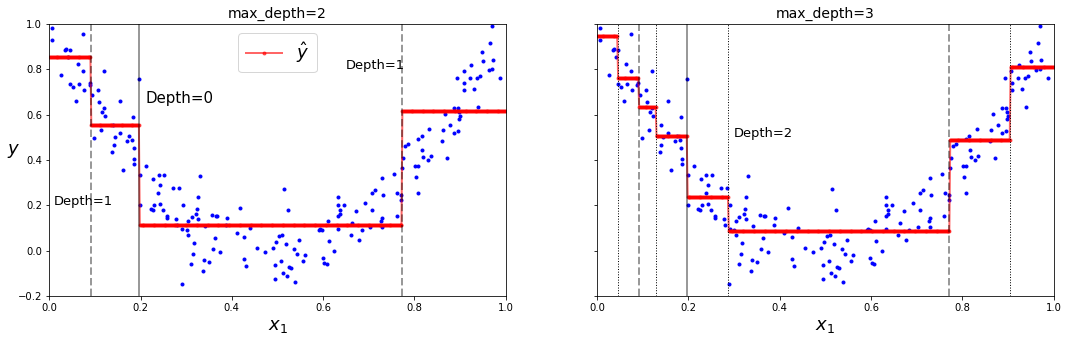

In [9]:
# this model's predictions are represented on the left of this next figure
# if you set 'max_depth=3', you get the predictions represented on the right
# notice how the predicted value for each region is always the average target value of the instances in that region
# the algorithm splits each region in a way that makes most training instances as close as possible to that predicted value

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)


def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$", alpha=0.6)


fig, axes = plt.subplots(ncols=2, figsize=(18, 5), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2, alpha=0.4)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
_ = plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2, alpha=0.4)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
_ = plt.title("max_depth=3", fontsize=14)


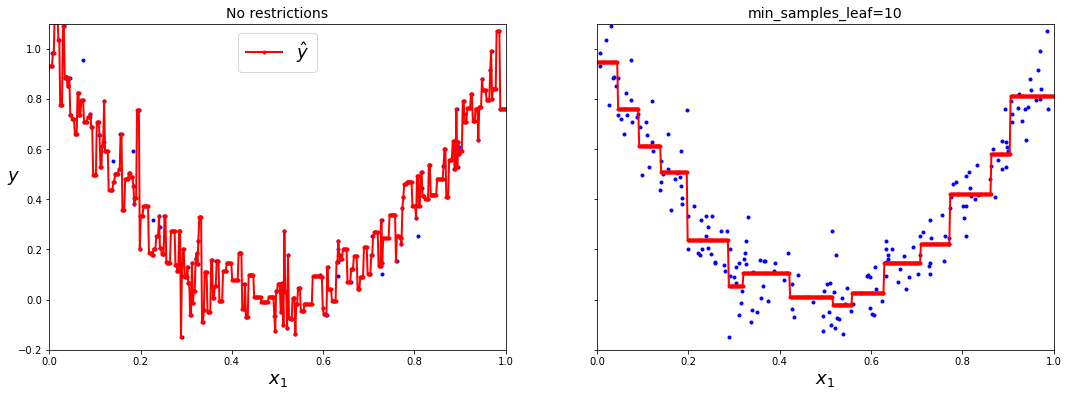

In [10]:
# without any regularization(i.e., using the default hyperparameters), you get the predictions on the left
# it is obviously overfitting the training set very badly
# just setting 'min_samples_leaf = 10' results in a much more reasonable model, represented on the right

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(18, 6), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
_ = plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
_ = plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

# Instability


Hopefully by now you are convinced that Decision Tree have a lot going for them:
- They are simple to understand and interpret, easy to use, versatile, and powerful.


However, they do have a few limitations:
- Decision Trees ove orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.
- More generally, the problem with Decision Trees is that they are very sensitive to small variations in the data.


Random Forests can limit this instability by averaging predictions over many trees, as we will see in the next chapter.

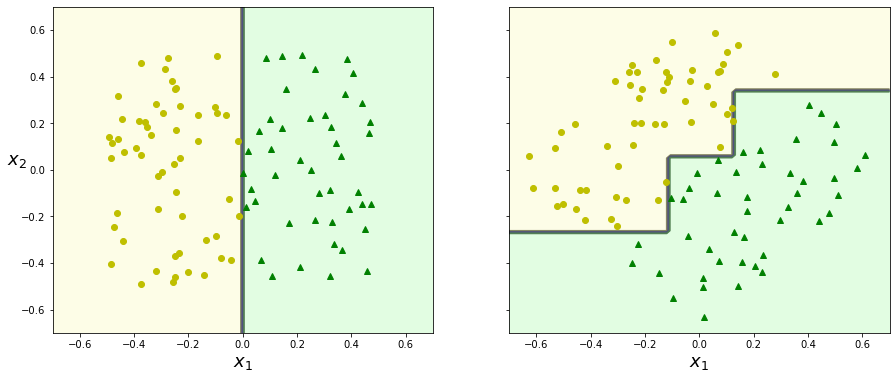

In [11]:
# for example, this figure shows a simple linearly separable dataset
# on the left:
#   # a Decision Tree can split it easily 
# on the right:
#   # after the dataset is rotated by 45-degree, the decision boundary looks unnecessarily convoluted
# although both Decision Trees fit the model perfectly, it is very likely that the model on the right will not generalize well
# one way to limit this probelm is to use PCA (see Chapter 8), which is often result in a better orientation of the training data

# dataset with x,y = [-0.6, 0.6] 
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

# rotation 
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
_= plt.ylabel("")

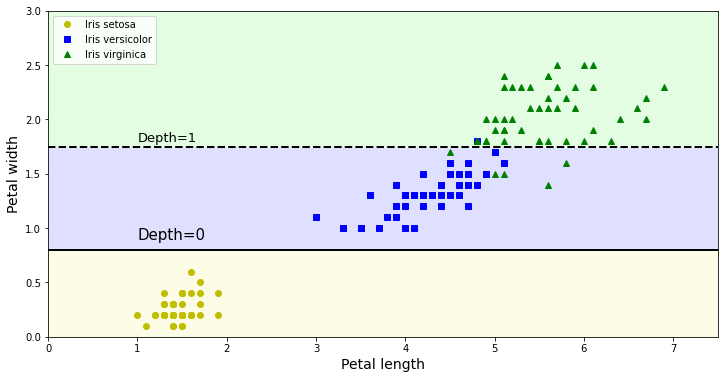

In [32]:
# for example, if you just remove the widest Iris-Versicolor from the previous dataset and train a new Decision Tree
# you can see, it looks very different from the previous Decision Tree
# actually, since the training algorithm used by Scikit-Learn is stochastic
# you may get very different models even on the same training data (unless you set the 'random_state' hyperparameter)

# remake the dataset
iris = datasets.load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40) # change random_state to modify result
tree_clf_tweaked.fit(X, y)

plt.figure(figsize=(12, 6))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
_ = plt.legend(loc='upper left')